# Pandas - Data Science with Python

Numpy and numpy arrays are our tool of choice for numeric data that resembles vectors, matrices (and higher dimensional tensors).

Where data is gathered from experiments, and in particular where we want to extract meaning from the combination of different data sources, and where data is often incomplete, the pandas library offers a number of useful tools (and has become a standard tool for data scientists).

In this section, we introduce the basics of Pandas.

In particular, we introduce the two key data types in Pandas: the ``Series`` and the ``DataFrame`` objects.

By convention, the `pandas` library is imported under the name `pd` (the same way that `numpy` is imported under the name `np`:

In [1]:
import pandas as pd

## Motivational example (Series)


Imagine we are working on software for a greengrocer or supermarket, and need to track the number of apples (10), oranges(3) and bananas (22) that are available in the supermarket. 

We could use a python list (or a numpy array) to track these numbers:

In [2]:
stock = [10, 3, 22]

However, we would need to remember separately that the entries are in the order of apples, oranges, and bananas. This could be achieved through a second list: 

In [3]:
stocklabels = ['apple', 'orange', 'banana']

In [4]:
assert len(stocklabels) == len(stock)  # check labels and 
                                       # stock are consistent
for label, count in zip(stocklabels, stock):
    print(f'{label:10s} : {count:4d}')

apple      :   10
orange     :    3
banana     :   22


The above 2-list solution is a little awkward in two ways: firstly, we have use two lists to describe one set of data (and thus need to be carefuly to update them simulatenously, for example), and secondly, the access to the data given a label is inconvenient: We need to find the index of the label with one list, then use this as the index to the other list, for example

In [5]:
index = stocklabels.index('banana')
bananas = stock[index]
print(f"There are {bananas} bananas [index={index}].")

There are 22 bananas [index=2].


We have come across similar examples in the section on dictionaries, and indeed a dictionary is a more convenient solution:

In [6]:
stock_dic = {'apple': 10, 
             'orange': 3,
             'banana': 22}

In a way, the keys of the dictionary contain the stock labels and the values contain the actual values:

In [7]:
stock_dic.keys()

dict_keys(['apple', 'orange', 'banana'])

In [8]:
stock_dic.values()

dict_values([10, 3, 22])

To retrieve (or change) the value for `apple`, we use `apple` as the key and retrieve the value through the dictionary's indexing notation:

In [9]:
stock_dic['apple']

10

And we can summarise the stock as follows:

In [10]:
for label in stock_dic:
    print(f'{label:10s} : {stock_dic[label]:4d}')

apple      :   10
orange     :    3
banana     :   22


This is a vast improvement over the 2-lists solution: (i) we only maintain one structure, which contains a value for every key - so we don't need to check that the lists have the same length. (ii) we can access individual elements through the label (using it as a key for the dictionary). 

The Pandas Series object address the requriments above. It is similar to a dictionary, but with improvements for the given problem:

* the order of the items is maintained
* the values have to have the same type (higher execution performance)
* a (large) number of convenience functionality, for example to deal with missing data, time series, sorting, plotting, and more 

## Pandas `Series`

### Stock example - `Series`

We can create a `Series` object - for example - from a dictionary:

In [11]:
stock = pd.Series({'apple': 10, 
                   'orange': 3,
                   'banana': 22})

The default presentation shows the entries one per row, with the label on the left, and the value on the right. 

In [12]:
type(stock)

pandas.core.series.Series

In [13]:
stock

apple     10
orange     3
banana    22
dtype: int64

The items on the left are referred to as the `index` of the Series, and are available as the `index` attribute of the `series` object:

In [14]:
stock.index

Index(['apple', 'orange', 'banana'], dtype='object')

In [15]:
type(stock.index)

pandas.core.indexes.base.Index

We can also access the list of values for each item, using the `values` attribute:

In [16]:
stock.values

array([10,  3, 22])

Regarding data access, the `Series` object behaves like a dictionary:

In [17]:
stock['apple']

10

In [18]:
stock['potato'] = 101    # adding more values
stock['cucumber'] = 1


In [19]:
print(stock)

apple        10
orange        3
banana       22
potato      101
cucumber      1
dtype: int64


In [20]:
stock

apple        10
orange        3
banana       22
potato      101
cucumber      1
dtype: int64

We can plot the data as a bar chart:

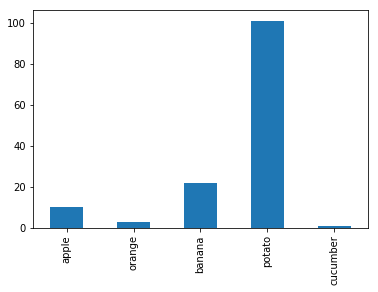

In [21]:
%matplotlib inline
stock.plot(kind='bar')

We can sort the data according to the values in the Series (and then plot to visualise):

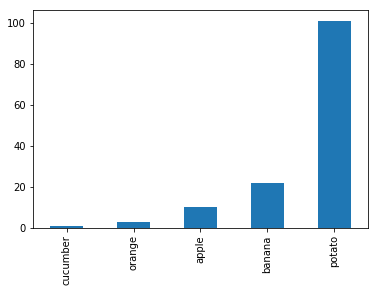

In [22]:
stock.sort_values().plot(kind='bar')

Or sort the index to get alphabetical order of our fruit and vegetables:

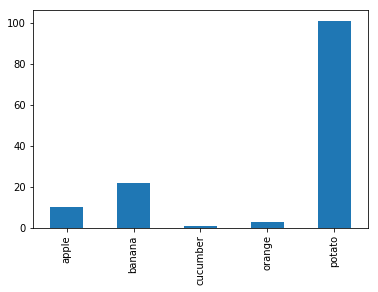

In [23]:
stock.sort_index().plot(kind='bar')

The `Series` object has a number of numerical methods available, including `mean` and `sum`:

In [24]:
stock.sum()

137

In [25]:
stock.mean()

27.4

It also behaves like a sequence in that the `len` function returns the number of data points in the Series object:

In [26]:
len(stock)

5

### memory usage

For larger data sets, it might be important to know how many bytes storing the Series costs. The bytes required to store the actual series data are available as

In [27]:
stock.nbytes

40

or from the underlying numpy array directly:

In [28]:
stock.values.nbytes

40

It is 40 bytes, because we have 5 elements stored as int64 (each needing 8 bytes):

In [29]:
stock.dtype

dtype('int64')

The Series object needs additional memory. This can be queried using:

In [30]:
stock.memory_usage()

240

### Statistics

A number of statistical descriptors of the data in the `stock` Series object is available using `describe()`:

In [31]:
stock.describe()

count      5.000000
mean      27.400000
std       41.955929
min        1.000000
25%        3.000000
50%       10.000000
75%       22.000000
max      101.000000
dtype: float64

As usual, the documentation strings provide documentation (`help(stock.describe)`), and the pandas home page (`https://pandas.pydata.org`) provides links to the Pandas documentation.


## Create Series from list

In the example above, we showed how to create a Series from a dictionary where the keys of the dictionary entries served as the index for the Series object. 

We can also create a Series from a list, an provide an additional index:

In [32]:
stock = pd.Series([10, 3, 22], index=['apple', 'orange', 'banana'])

In [33]:
stock

apple     10
orange     3
banana    22
dtype: int64

If we omit the `index` argument, the Series will assume an integer index:

In [34]:
stock = pd.Series([10, 3, 22])

In [35]:
stock

0    10
1     3
2    22
dtype: int64

However, an index can be added subsequently:

In [36]:
stock.index = ['apple', 'orange', 'banana']

In [37]:
stock


apple     10
orange     3
banana    22
dtype: int64

## Plotting data

Commonly used plots are easily accessible via the `plot()` method of the Series object. We have seen a bar plot above already. The `Series.plot()` method accepts an argument `kind` such as `kind="bar"`, but there is an equivalent method `Series.plot.bar()` avaialble.

Further examples:

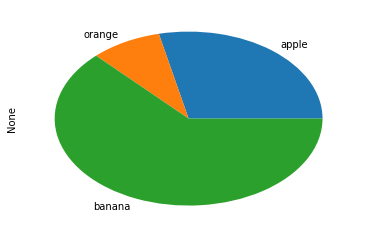

In [38]:
stock.plot.pie()


To tailor the plot, we can either get the axis object and modify it subsequently:

Text(0.5,1,'')

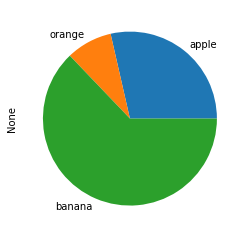

In [39]:
ax = stock.plot.pie()
ax.set_aspect(1)
ax.set_ylabel(None);
ax.set_title("")

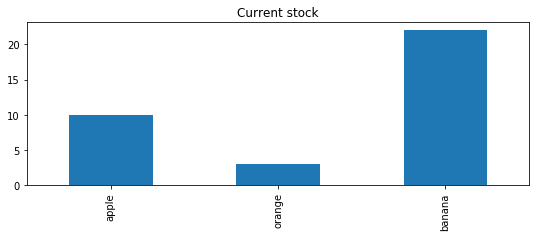

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(9, 3))
stock.plot.bar(ax=ax)
ax.set_title("Current stock");

We can also fetch the data from the series and drive the plotting "manually" ourselves:

Text(0.5,1,'Stock')

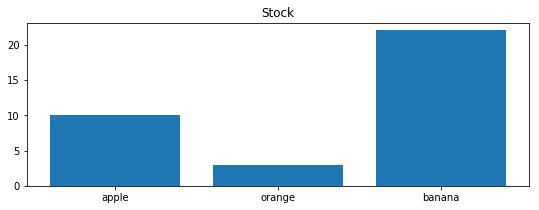

In [41]:
import matplotlib.pyplot as plt

names = list(stock.index)
values = list(stock.values)

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
ax.bar(names, values)
ax.set_title('Stock')

## Missing values

"Real" data sets tend to be incomplete. Dealing with missing values is an important topic in data science. The agreement in Pandas is that the special floating point value "NaN" (standing for `N`ot `a` `N`umber) represents missing data points. For example, if we have a table for the stock, but we don't know the value for `apple`, we would replace it with `NaN`. 

The special `Nan` value in Python can be created using `float('nan')` or using `numpy.nan` if the `numpy` module is imported.

In [42]:
stock['apple'] = float('nan')

In [43]:
stock

apple      NaN
orange     3.0
banana    22.0
dtype: float64

Note that the `dtype` of the `stock` Series object has changed from `int64` to `float64` when we assigned `NaN` to `apple`: the whole series has been converted to float, because `NaN` is only defined for floating point numbers. 

(There is a proposal to create a `NaN` object as part of pandas - this would overcome the above limitation.)

Assume we need to calculate how many items of stock we have in total using the `sum` function:

In [44]:
stock.values

array([nan,  3., 22.])

A common situation is that we have an incomplete Series or DataFrame (which are multiple Series with the same index) and we want to process with our analysis, but treat the missing values in a special way.

In [45]:
stock.sum()

25.0

The above example `sum` shows that `NaN` values are simply ignored, which can be convenient.

We can also 'tidy up' the Series object, by removing all entries that have a `NaN` value:

In [46]:
stock.dropna()

orange     3.0
banana    22.0
dtype: float64

## Series data access: explicit and implicit (`loc` and `iloc`)

In [47]:
stock = pd.Series({'apple': 10, 
                   'orange': 3,
                   'banana': 22,
                   'cucumber' : 1,
                   'potato' : 110})

In [48]:
stock

apple        10
orange        3
banana       22
cucumber      1
potato      110
dtype: int64

### Indexing

We can access single values through their index as if the stock Series object would be a dictionary:

In [49]:
stock['banana']

22

There is an equivalent and recommended way of using this retrieval using the `loc` (for LOCation?) attribute:

In [50]:
stock.loc['banana']

22

For convenience, pandas also (!) allows us to use integer indexing into the Series object. This is called *implicit* indexing as the series Object doesn't use integers as the index, but the name of the fruits.

For example, we can also retrieve the value for `banana` through its implicit index 2, because it is in row 3 of the Series object (which would need index 2 as we start counting from 0):


In [51]:
stock[2]

22

In this example, this works fine and seems convenient, but can become very confusing if the actual index of the object consists of integers. For that reason, the explicit (and recommended way) of using the indirect indexing is through the `iloc` (ImplicitLOCation) attribute:

In [52]:
stock.iloc[2]

22

### Slicing

In [53]:
stock

apple        10
orange        3
banana       22
cucumber      1
potato      110
dtype: int64

We can also slice the Series:

In [54]:
stock['orange':'potato']

orange        3
banana       22
cucumber      1
potato      110
dtype: int64

Or skip every second entry:



In [55]:
stock['orange':'potato':2]

orange      3
cucumber    1
dtype: int64

### Data manipulation

Numerical operations on the series object can be carried for all data values at the same time inthe same way that numpy arrays are processed:

In [56]:
stock - stock.mean()

apple      -19.2
orange     -26.2
banana      -7.2
cucumber   -28.2
potato      80.8
dtype: float64

In [57]:
import numpy as np

In [58]:
np.sqrt(stock)

apple        3.162278
orange       1.732051
banana       4.690416
cucumber     1.000000
potato      10.488088
dtype: float64

Where preferred, we can extract the numpy array and work with that:

In [59]:
data = stock.values

In [60]:
type(data)

numpy.ndarray

In [61]:
data - data.mean()

array([-19.2, -26.2,  -7.2, -28.2,  80.8])

### Import and Export

Pandas (and its objects `Series` and `DataFrame`) support export to and import from a number of useful formats.

For example, we can write a `Series` object into a comma separated value file:

In [62]:
stock.to_csv('stock.csv', header=False)

In [63]:
!cat stock.csv

apple,10
orange,3
banana,22
cucumber,1
potato,110


We can also create a $\LaTeX$ representation of the table:

In [64]:
stock.to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &    0 \\\\\n\\midrule\napple    &   10 \\\\\norange   &    3 \\\\\nbanana   &   22 \\\\\ncucumber &    1 \\\\\npotato   &  110 \\\\\n\\bottomrule\n\\end{tabular}\n'

We'll come back to reading from files in the `DataFrame` section.

## Data Frame

### Stock Example - `DataFrame`

After having introduced the `Series` object above, we will focus on the second important type in pandas: the `DataFrame`.

As a first description, we could say that the `DataFrame` is similar to a (2d) spreadsheet: it contains rows and columns.

The series object we have studied above is a special case of the `DataFrame`, where the `DataFrame` has only one column.

We'll continue with our stock example:

In [65]:
stock

apple        10
orange        3
banana       22
cucumber      1
potato      110
dtype: int64

In addition to tracking how many objects of each type we have stocked, we have a second Series object that provides the price per item at which the item is sold:

In [66]:
price = pd.Series({'apple': 0.55, 'banana': 0.50, 'cucumber' : 0.99, 'potato' : 0.17, 'orange': 1.76})
price

apple       0.55
banana      0.50
cucumber    0.99
potato      0.17
orange      1.76
dtype: float64

The `DataFrame` object allows us to treat the two series together. In fact, a convenient way to create the `DataFrame` object is to combine a number of series as follows:

In [67]:
shop = pd.DataFrame({'stock' : stock, 'price' : price})
shop

,stock,price
apple,10,0.55
banana,22,0.50
cucumber,1,0.99
orange,3,1.76
potato,110,0.17


Because both `Series` objects had the same `index` elements, our data is nicely aligned in the `DataFrame` with name `shop`, even though the data was stored in different order in the `price` and `stock`.

If one Series is missing a data point, pandas will insert a `NaN` entry into that field:

In [68]:
price2 = price.copy()

In [69]:
price2['grapefruit'] = 1.99
price2

apple         0.55
banana        0.50
cucumber      0.99
potato        0.17
orange        1.76
grapefruit    1.99
dtype: float64

In [70]:
pd.DataFrame({'stock' : stock, 'price' : price2})

,stock,price
apple,10.0,0.55
banana,22.0,0.50
cucumber,1.0,0.99
grapefruit,NaN,1.99
orange,3.0,1.76
potato,110.0,0.17


### Accessing data in a DataFramea


In [71]:
shop

,stock,price
apple,10,0.55
banana,22,0.50
cucumber,1,0.99
orange,3,1.76
potato,110,0.17


The data frame has an *index* which is the same for all columns, and shown in bold in the left most column. We can also ask for it:

In [72]:
shop.index

Index(['apple', 'banana', 'cucumber', 'orange', 'potato'], dtype='object')

Each column has name (here `stock` and `price`):

In [73]:
shop.columns

Index(['stock', 'price'], dtype='object')

### Extracting columns of data

Using the column names, we can extract one column into a Series object using the index operator (`[]`):

In [74]:
shop['stock']

apple        10
banana       22
cucumber      1
orange        3
potato      110
Name: stock, dtype: int64

In [75]:
shop['price']

apple       0.55
banana      0.50
cucumber    0.99
orange      1.76
potato      0.17
Name: price, dtype: float64


### Extracting rows of data

We have two options of extracting a row of data. 

First, explicit indexing using the label of the index in that row:

In [76]:
shop.loc['apple']             # single row is returned as series

stock    10.00
price     0.55
Name: apple, dtype: float64

In [77]:
shop.loc['banana':'cucumber']  # multiple rows are returned as DataFrame

,stock,price
banana,22,0.50
cucumber,1,0.99


Second, we can use the implicit indexing (as for Series objects):

In [78]:
shop.iloc[0]

stock    10.00
price     0.55
Name: apple, dtype: float64

In [79]:
shop.iloc[1:3]

,stock,price
banana,22,0.50
cucumber,1,0.99


#### Warning

Note that there are some inconsistencies here: the explicit slicing with index labels (such as `.loc['banana':'cucumber']`) is inclusive of `cucumber`, whereas in the implicit slicing (such as `.iloc[1:3]`) the row with index `3` is *not* included.

The behaviour of `.loc` is convenient and a good design choice if labels such as strings in our `stock` example are used. The behaviour of `.iloc` is reflecting the normal Python behaviour.

It is thus understandable how we have arrived at the situation.



### Data manipulation with `shop`

The real strength of the DataFrames is that we can continue to process the data conveniently. 

For example, we could work out the financial value of the items we have in stock, and add this as an extra column:

In [80]:
shop['value'] = shop['price'] * shop['stock']
shop

,stock,price,value
apple,10,0.55,5.50
banana,22,0.50,11.00
cucumber,1,0.99,0.99
orange,3,1.76,5.28
potato,110,0.17,18.70


In [81]:
shop['value'].sum()

41.47

## Example: European population 2017

Here is a second example to demonstrate some use cases of pandas DataFrames.

First, we get the data. It is originally from EUROSTAT ...

In [82]:
#NBVAL_IGNORE_OUTPUT
!wget https://fangohr.github.io/data/eurostat/population2017/eu-pop-2017.csv

--2019-06-19 13:46:59--  https://fangohr.github.io/data/eurostat/population2017/eu-pop-2017.csv
Resolving fangohr.github.io... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to fangohr.github.io|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1087 (1.1K) [text/csv]
Saving to: ‘eu-pop-2017.csv.2’

eu-pop-2017.csv.2   100%[===================>]   1.06K  --.-KB/s    in 0s      

2019-06-19 13:46:59 (28.8 MB/s) - ‘eu-pop-2017.csv.2’ saved [1087/1087]



Further reading on `[]`, `.loc[]` and `.iloc[]` from Ted Petrou as a [Jupyter Notebook]( https://github.com/tdpetrou/Learn-Pandas/blob/master/Learn-Pandas/Selecting%20Subsets/01%20Selecting%20Subsets%20with%20%5B%20%5D%2C%20.loc%20and%20.iloc.ipynb) and [blog entry](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c).
